In [39]:
import allel
import csv
import pandas as pd
from functools import reduce
import os
import sys
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set_style('white')
# sns.set_style('ticks')
# sns.set_context('notebook')
import h5py
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
import IPython
import pandas_profiling as pp
import mplcursors
from mpldatacursor import datacursor
#%matplotlib nbagg
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly 
from IPython.display import IFrame
%config InlineBackend.figure_format ='retina'
from beakerx.object import beakerx

### Read all VCF files from source, and read each file as dataframe 

In [32]:
import glob
import os
#vcf_path="J:/Experimental data/2.0 CURRENT STUDIES/CCR001/Data uploaded to AnalytixAgility/IBD Donors whole exome vcfs/"
vcf_path="C:/Reprocell/IBD Donors whole exome vcfs/"

In [33]:
#/P15-005.vcf.gz
filenames=glob.glob(vcf_path+'*.vcf.gz')


### TNF IBD

In [41]:
#tnf_csv1="J:/Experimental data/2.0 CURRENT STUDIES/CCR001/Data uploaded to AnalytixAgility/TNFa levels pgml_IBD_25 donors.csv"
tnf_csv1="C:/Reprocell/data/TNFa levels pgml_IBD_25 donors.csv"

In [42]:
tnf_df = pd.read_csv(tnf_csv1)

In [46]:
tnf_df.head(10)

In [44]:
#Replace whitepsace in column names
#tnf_df.columns = tnf_df.columns.str.strip().str.lower().str.replace(' ', '_')
tnf_df.columns = tnf_df.columns.str.strip().str.replace(' ', '_')

In [45]:
tnf_df.head(10)

In [11]:
#tnf_df.profile_report()
#pp.ProfileReport(tnf_df)
#profile = tnf_df.profile_report(plot={'histogram': {'bins': 8}})


In [12]:
#rejected_variables = profile.get_rejected_variables(threshold=.9)

In [47]:
drop_down1=widgets.Dropdown(
    options=tnf_df.columns.values,
    value='SEB',
    description='Column 1:',
    disabled=False,
     )
drop_down2=widgets.Dropdown(
    options=tnf_df.columns.values,
    value='SEB',
    description='Column 2:',
    disabled=False,
     )

def update_barchart(column1, column2):
    return tnf_df.groupby([column1, column2]).size().unstack().plot(kind='bar',stacked=True)
   
interactive(update_barchart, column1=drop_down1,column2=drop_down2)
##plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


interactive(children=(Dropdown(description='Column 1:', index=3, options=('Donor_ID', 'Media_Only', 'Media_Onl…

In [23]:
drop_down=widgets.Dropdown(
    options=tnf_df.columns.values,
    value='SEB',
    description='Column:',
    disabled=False,
     )
print(drop_down)
column2=tnf_df['Donor_ID']
def update_barchart(columns):
    
    return tnf_df.groupby(columns).size().plot(kind='bar',stacked=True)
    

interactive(update_barchart, columns=drop_down)

Dropdown(description='Column:', index=3, options=('Donor_ID', 'Media_Only', 'Media_Only.1', 'SEB', 'SEB.1', 'SEB_5ASA', 'SEB_5ASA.1', 'SEB_Pred_1uM', 'SEB_Pred_1uM.1', 'SEB_DMSO', 'SEB_DMSO.1', 'SEB_Pred_100nM', 'SEB_Pred_100nM.1', 'SEB_BIRB796_100nM', 'SEB_BIRB796_100nM.1', 'SEB_BIRB796_10nM', 'SEB_BIRB796_10nM.1'), value='SEB')


interactive(children=(Dropdown(description='Column:', index=3, options=('Donor_ID', 'Media_Only', 'Media_Only.…

In [49]:
#donor_loc = tnf_df.columns.get_loc('SEB 5ASA')
donor_slice = np.r_[0, 3:17]
tnf_dfs=tnf_df.iloc[:,donor_slice]
tnf_dfs.head(5)

#### Calculate mean between 2s' columns

In [50]:
s1=tnf_dfs[['SEB', 'SEB.1']].mean(axis=1)
s2=tnf_dfs[['SEB_5ASA', 'SEB_5ASA.1']].mean(axis=1)
s3=tnf_dfs[['SEB_DMSO', 'SEB_DMSO.1']].mean(axis=1)
s4=tnf_dfs[['SEB_Pred_1uM','SEB_Pred_1uM.1']].mean(axis=1)
s5=tnf_dfs[['SEB_Pred_100nM','SEB_Pred_100nM.1']].mean(axis=1)
s6=tnf_dfs[['SEB_BIRB796_100nM', 'SEB_BIRB796_100nM.1']].mean(axis=1)
s7=tnf_dfs[['SEB_BIRB796_10nM', 'SEB_BIRB796_10nM.1']].mean(axis=1)

In [51]:
tnf_dfs_mean = tnf_dfs[['Donor_ID']].assign(SEB_mean=s1, SEB5ASA_mean=s2, SEBDMSO_mean=s3, SEBPred1uM_mean=s4,SEBPred100nM_mean=s5, SEBBirb796100nM=s6, SEBBirb79610nM=s7)

In [52]:
tns_control=tnf_dfs_mean[['Donor_ID','SEB_mean','SEBDMSO_mean']]
tns_control

In [13]:
#tnf_dfs_mean.columns[1:]

In [14]:
#col_options = [{"name":x, "id":x} for x in tnf_dfs_mean.columns[1:]]

#### Compare each mean column against the control column 

In [53]:
t1=tnf_dfs_mean['SEB5ASA_mean']/tnf_dfs_mean['SEB_mean']*100
t2=tnf_dfs_mean['SEBPred1uM_mean']/tnf_dfs_mean['SEBDMSO_mean']*100
t3=tnf_dfs_mean['SEBPred100nM_mean']/tnf_dfs_mean['SEBDMSO_mean']*100
t4=tnf_dfs_mean['SEBBirb796100nM']/tnf_dfs_mean['SEBDMSO_mean']*100
t5=tnf_dfs_mean['SEBBirb79610nM']/tnf_dfs_mean['SEBDMSO_mean']*100
tnf_mean_compare = round(tnf_dfs_mean[['Donor_ID']].assign(SEB5ASA_SEB=t1, SEBPred1uM_SEBDMSO=t2, SEBPred100nM_SEBDMSO=t3, SEBBirb796100nM_SEBDMSO=t4,SEBBirb79610nM_SEBDMSO=t5),3)

In [55]:
tnf_mean_compare.head(1)

In [57]:
#Set index to apply substract on the whole datafraame 
tnf_mean_compare_i=tnf_mean_compare.set_index('Donor_ID')
tnf_mean_compare_i.head(2)

### Difference from 100

In [58]:
tnf_mean_compare_i_r=tnf_mean_compare_i.sub(100)
tnf_mean_compare_i_r.head(2)

In [59]:
tnf_mean_compare_i_r.reset_index(level =['Donor_ID'], inplace = True) 

In [60]:
format_mapping={'SEB5ASA_SEB': '{:,.3f}', 'SEBPred1uM_SEBDMSO': '{:,.3f}', 'SEBPred100nM_SEBDMSO': '{:.3f}','SEBBirb796100nM_SEBDMSO': '{:.3f}','SEBBirb79610nM_SEBDMSO': '{:.3f}'}

In [61]:
# for key, value in format_mapping.items():
#     tnf_mean_compare_i_r[key] = tnf_mean_compare_i_r[key].apply(value.format)

In [62]:
tnf_control=tnf_dfs_mean[['Donor_ID','SEB_mean','SEBDMSO_mean']]
tnf_control

In [63]:
tnf_compare=tnf_mean_compare_i_r.merge(tnf_control, left_on='Donor_ID', right_on='Donor_ID', how='outer')


In [64]:
tnf_compare

In [65]:
col_options = [dict(label=x, value=x) for x in tnf_mean_compare_i_r.columns]
col_options[1:]

[{'label': 'SEB5ASA_SEB', 'value': 'SEB5ASA_SEB'},
 {'label': 'SEBPred1uM_SEBDMSO', 'value': 'SEBPred1uM_SEBDMSO'},
 {'label': 'SEBPred100nM_SEBDMSO', 'value': 'SEBPred100nM_SEBDMSO'},
 {'label': 'SEBBirb796100nM_SEBDMSO', 'value': 'SEBBirb796100nM_SEBDMSO'},
 {'label': 'SEBBirb79610nM_SEBDMSO', 'value': 'SEBBirb79610nM_SEBDMSO'}]

In [67]:
import plotly.graph_objects as go

In [28]:

# fig = go.Figure()

# # Add traces
# fig.add_trace(go.Scatter(y=tnf_mean_compare_i_r['SEB5ASA_SEB'],
#                     mode='markers',name='SEB5ASA_SEB',
#                                 text=tnf_mean_compare_i_r['Donor_ID']))
# fig.add_trace(go.Scatter(y=tnf_mean_compare_i_r['SEBPred1uM_SEBDMSO'], 
#                     mode='markers', name='SEBPred1uM_SEBDMSO',
#                                 text=tnf_mean_compare_i_r['Donor_ID']))
# fig.add_trace(go.Scatter(y=tnf_mean_compare_i_r['SEBPred100nM_SEBDMSO'], 
#                     mode='markers', name='SEBPred100nM_SEBDMSO',
#                                 text=tnf_mean_compare_i_r['Donor_ID']))
# fig.show()

In [68]:
col=tnf_compare.columns[2:6]

In [70]:
fig=go.Figure()
for i in col:
    fig.add_trace(go.Scatter(x=tnf_compare['SEBDMSO_mean'],y=tnf_compare[i],
                     mode='markers',name=i,
                                text=tnf_compare['Donor_ID']))
fig.add_trace(go.Scatter(x=tnf_compare['SEB_mean'],y=tnf_compare['SEB5ASA_SEB'],
                     mode='markers',name='SEB5ASA_SEB',
                                text=tnf_compare['Donor_ID']))
fig.show()

### Variable selection for Reduction

In [71]:
# x=(10, 100000, 10))

drop_down=widgets.Dropdown(
    options=tnf_mean_compare_i_r[['SEB5ASA_SEB', 'SEBPred1uM_SEBDMSO', 'SEBPred100nM_SEBDMSO',
       'SEBBirb796100nM_SEBDMSO', 'SEBBirb79610nM_SEBDMSO']],
    value='SEB5ASA_SEB',
        description='Drug used',
    disabled=False
     )
def patients(column):
    #Return the reduction lists based on the column selected
    dr=tnf_mean_compare_i_r[tnf_mean_compare_i_r[column]<0][['Donor_ID',column]]
    dr[[column+'_abs']]=abs(dr[[column]]) #Get absolute value of the selected column
    return dr[['Donor_ID',column+'_abs']]  
    
interact(patients, column=drop_down);
iout=interactive(patients, column=drop_down);

# if drop_down.value=='SEB5ASA_SEB':
#     dr=tnf_mean_compare_i_r[tnf_mean_compare_i_r['SEB5ASA_SEB']<0][['Donor_ID','SEB5ASA_SEB']]
#     dr[['SEB5ASA_SEB'+'_abs']]=abs(dr[['SEB5ASA_SEB']]) #Get absolute value of the selected column
#     iout.result=dr[['Donor_ID','SEB5ASA_SEB_abs']]  
   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



interactive(children=(Dropdown(description='Drug used', options=('SEB5ASA_SEB', 'SEBPred1uM_SEBDMSO', 'SEBPred…

In [72]:
import plotly.express as px

In [73]:
cat=int(input('Enter the range you want : '))

Enter the range you want : 25


In [74]:
def bins_label(bin):    
    binlabel=[]
    bincount=int(100/bin)
    start=0
    end=bin
    for i in range(bincount):
        r=str(start)+'-'+str(end)
        binlabel.insert(i, r)
        start=start+bin
        end=end+bin
    return binlabel;

In [75]:
def bin_range(bin):
    binrange=[]
    bincount=int(100/bin)
    binvalue=0
    for x in range(0,bincount+1):
        binrange.insert(x,binvalue)
        binvalue=binvalue+bin
    return binrange;

In [76]:
bins_label=bins_label(cat)
print(bins_label)

['0-25', '25-50', '50-75', '75-100']


In [77]:
bins_range=bin_range(cat)
print(bins_range)

[0, 25, 50, 75, 100]


Text(0, 0.5, 'No of patients')

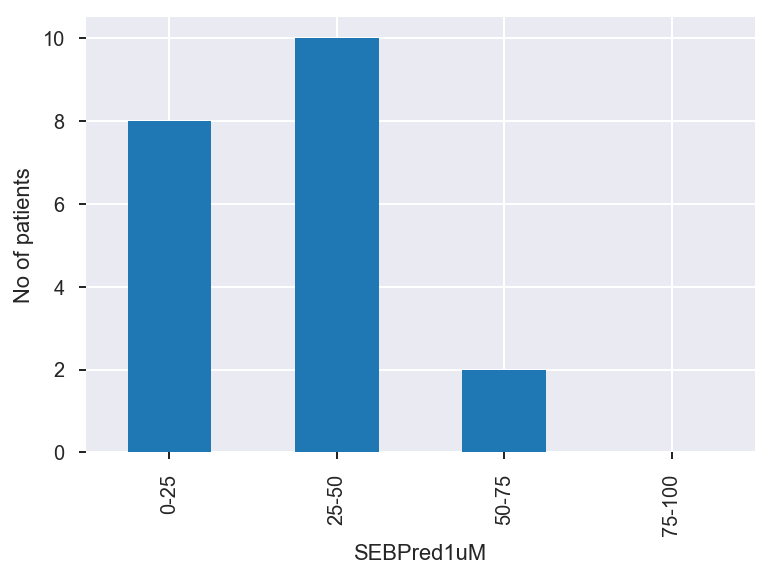

In [78]:
r=iout.result
cr=r.columns[1]+'_range'
cr=cr[0:cr.index('_')]
r[cr]=pd.cut(x=r[r.columns[1]], bins=bins_range, labels=bins_label, right=False)
rb=r.groupby(cr).size().plot(kind='bar',stacked=True)
rb.set_ylabel("No of patients")

### Select a group to find the patients

In [79]:
drop_style = {'description_width': '450px'}
drop_layout = {'width': '530px'}
drop_down=widgets.Select(
    options=r[cr].unique().sort_values(ascending=True),
    value=None,
        description=cr,
    disabled=False,
    style=drop_style,
    layout=drop_layout
     )

def patients(column):
    #return tnf_lowest[tnf_lowest.lowest==column][['Donor_ID']].tolist()
    return r[r[cr]==column]['Donor_ID'].tolist()
    

iout_p=interactive(patients, column=drop_down)
interact(patients, column=drop_down)

interactive(children=(Select(description='SEBPred1uM', layout=Layout(width='530px'), options=('0-25', '25-50',…

<function __main__.patients(column)>

### Find matching SNP of the selected patients

In [81]:
ir=iout_p.result # Get the Donor_ID list based on the selected drug
# Read each Donor_ID and find the filename from source based on Donor_ID
if len(ir)>1:
    try:
        plist=[]
        for j in ir:     
            fnames=vcf_path+str(j)+'.vcf.gz'
            plist.append(fnames)
#Read each VCF file and convert it to Pandas Dataframe, and append all dataframes as a list
        adfrows=0
        df_plist=[]
        for fname in plist:
            df = allel.vcf_to_dataframe(fname, fields=['CHROM','POS','ID','REF','ALT'],alt_number=1)
            adfrows=adfrows+len(df)
            df_plist.append(df)
        s=reduce(lambda left,right: pd.merge(left,right), df_plist)
        print(len(s),' SNPs match')
#Average rows of patient
        avg_adfrows=round(adfrows/len(df_plist))
#Find the similartity among the selected patients
        similarity=round(len(s)/avg_adfrows,2)*100
        print('Similarity :',"{:.2f}".format(similarity),'%')
    except:
         print("Oops!",sys.exc_info()[0],"occured.")

11838  SNPs match
Similarity : 31.00 %


#### End of Reduction 

In [101]:
#Get first 50 SNP as sample to get their corresponding gene names
snplists=s['ID'][:50]


In [102]:
snplists.to_csv(r'c:/ibdapps/snplists.csv', header=True, index=False)

In [104]:
print(snplists.to_list())

['rs4072383', 'rs3748592', 'rs4970378', 'rs3748595', 'rs3828047', 'rs3748596', 'rs3748597', 'rs369883627', 'rs13303010', 'rs4970441', 'rs2340593', 'rs15842', 'rs8997', 'rs2799066', 'rs3128102', 'rs10267', 'rs9803031', 'rs4633229', 'rs6603781', 'rs10907179', 'rs307349', 'rs307350', 'rs307378', 'rs307377', 'rs307362', 'rs140777846', 'rs12755088', 'rs1059822', 'rs1059831', 'rs36039898', 'rs16825265', 'rs2294488', 'rs2376805', 'rs28581504', 'rs2645081', 'rs78924098', 'rs12727342', 'rs2477699', 'rs2477706', 'rs2985862', 'rs2843401', 'rs4648657', 'rs4648659', 'rs4648662', 'rs870124', 'rs6424078', 'rs2493249', 'rs2185639', 'rs4638054', 'rs10797395']


# Increase

In [105]:
def my_cut (x, bins,
            lower_infinite=True, upper_infinite=True,
            **kwargs):
    r"""Wrapper around pandas cut() to create infinite lower/upper bounds with proper labeling.

    Takes all the same arguments as pandas cut(), plus two more.

    Args :
        lower_infinite (bool, optional) : set whether the lower bound is infinite
            Default is True. If true, and your first bin element is something like 20, the
            first bin label will be '<= 20' (depending on other cut() parameters)
        upper_infinite (bool, optional) : set whether the upper bound is infinite
            Default is True. If true, and your last bin element is something like 20, the
            first bin label will be '> 20' (depending on other cut() parameters)
        **kwargs : any standard pandas cut() labeled parameters

    Returns :
        out : same as pandas cut() return value
        bins : same as pandas cut() return value
    """

    # Quick passthru if no infinite bounds
    if not lower_infinite and not upper_infinite:
        return pd.cut(x, bins, **kwargs)

    # Setup
    num_labels      = len(bins) - 1
    include_lowest  = kwargs.get("include_lowest", False)
    right           = kwargs.get("right", True)

    # Prepend/Append infinities where indiciated
    bins_final = bins.copy()
    if upper_infinite:
        bins_final.insert(len(bins),float("inf"))
        num_labels += 1
    if lower_infinite:
        bins_final.insert(0,float("-inf"))
        num_labels += 1

    # Decide all boundary symbols based on traditional cut() parameters
    symbol_lower  = "<=" if include_lowest and right else "<"
    left_bracket  = "(" if right else "["
    right_bracket = "]" if right else ")"
    symbol_upper  = ">" if right else ">="

    # Inner function reused in multiple clauses for labeling
    def make_label(i, lb=left_bracket, rb=right_bracket):
        return "{0}{1}, {2}{3}".format(lb, bins_final[i], bins_final[i+1], rb)

    # Create custom labels
    labels=[]
    for i in range(0,num_labels):
        new_label = None

        if i == 0:
            if lower_infinite:
                new_label = "{0} {1}".format(symbol_lower, bins_final[i+1])
            elif include_lowest:
                new_label = make_label(i, lb="[")
            else:
                new_label = make_label(i)
        elif upper_infinite and i == (num_labels - 1):
            new_label = "{0} {1}".format(symbol_upper, bins_final[i])
        else:
            new_label = make_label(i)

        labels.append(new_label)

    # Pass thru to pandas cut()
    return pd.cut(x, bins_final, labels=labels, **kwargs)

### Variable selection for increase

In [106]:
drop_down=widgets.Dropdown(
    options=tnf_mean_compare_i_r[['SEB5ASA_SEB', 'SEBPred1uM_SEBDMSO', 'SEBPred100nM_SEBDMSO',
       'SEBBirb796100nM_SEBDMSO', 'SEBBirb79610nM_SEBDMSO']],
    value='SEB5ASA_SEB',
        description='Drug used',
    disabled=False
     )

def patients(column):
    #Return the reduction lists based on the column selected
    di=tnf_mean_compare_i_r[tnf_mean_compare_i_r[column]>=0][['Donor_ID',column]]
    return di[['Donor_ID',column]]

iout=interactive(patients, column=drop_down);
interact(patients, column=drop_down);


interactive(children=(Dropdown(description='Drug used', options=('SEB5ASA_SEB', 'SEBPred1uM_SEBDMSO', 'SEBPred…

#### Provide range (1-100)

Text(0, 0.5, 'No of patients')

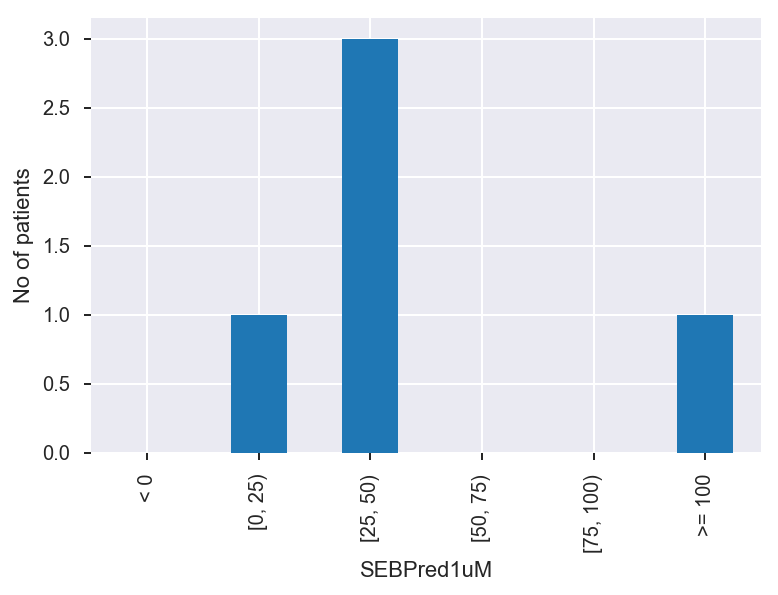

In [107]:
ir=iout.result
cir=ir.columns[1]+'_range'
cir=cir[0:cir.index('_')]
#ir[cir]=my_cut(x=ir[ir.columns[1]], bins=bins_range, precision=0,right=False)
ir[cir]=my_cut(x=ir[ir.columns[1]], bins=bins_range, precision=0,right=False)
ib=ir.groupby(cir).size().plot(kind='bar',stacked=True)
ib.set_ylabel("No of patients")

In [108]:
drop_style = {'description_width': '450px'}
drop_layout = {'width': '530px'}
drop_down=widgets.Select(
    options=ir[cir].unique().sort_values(ascending=True),
    value=None,
        description=cir,
    disabled=False,
    style=drop_style,
    layout=drop_layout
     )

def patients(column):
    #return tnf_lowest[tnf_lowest.lowest==column][['Donor_ID']].tolist()
    return ir[ir[cir]==column]['Donor_ID'].tolist()
    

iout_p=interactive(patients, column=drop_down)
interact(patients, column=drop_down)


interactive(children=(Select(description='SEBPred1uM', layout=Layout(width='530px'), options=('[0, 25)', '[25,…

<function __main__.patients(column)>

#### Find SNP matching of the selected  patients 

In [91]:
ii=iout_p.result # Get the Donor_ID list based on the selected drug
# Read each Donor_ID and find the filename from source based on Donor_ID
if len(ii)>1:
    try:
        ilist=[]
        for j in ii:     
            fnames=vcf_path+str(j)+'.vcf.gz'
            ilist.append(fnames)
#Read each VCF file and convert it to Pandas Dataframe, and append all dataframes as a list
        adfrows=0
        df_ilist=[]
        for fname in ilist:
            df = allel.vcf_to_dataframe(fname, fields=['CHROM','POS','ID','REF','ALT'],alt_number=1)
            adfrows=adfrows+len(df)
            df_ilist.append(df)
        si=reduce(lambda left,right: pd.merge(left,right), df_ilist)
        print(len(si),' SNP match')
#Average rows of patient
        avg_adfrows=round(adfrows/len(df_ilist))
#Find the similartity among the selected patients
        similarity=(len(si)/avg_adfrows)*100
        print('Similarity :',"{:.2f}".format(similarity),'%')
    except:
         print("Oops!",sys.exc_info()[0],"occured.")

19412  SNP match
Similarity : 51.55 %


### End of increase

### IBD Donor medical history

In [ ]:
#ibd_new

In [ ]:
#ibd_new=ibd_new.rename({'Tissue_Receipt#':'Donor_ID'},axis=1)

In [149]:
# #ibd_df=ibd_new.replace({'Donor_ID': {'BT15401':'P15-073', 'BT16002':'P16-001', 'BT16011':'P16-002','BT16018':'P16-003','BT16026':'P16-005',
#                                       'BT16021':'P16-004','BT15012':'P15-002','BT15027':'P15-012','BT15032':'P15-017','BT15041':'P15-020',
#                                       'BT15078':'P15-030','BT15100':'P15-035','BT15141':'P15-044','BT15188':'P15-041','BT15215':'P15-040',
#                                       'BT15228':'P15-058','BT15259':'P15-061','BT15335':'P15-065','BT15063':'P15-025','BT15354':'P15-067',
#                                       'BT15013':'P15-004','BT15014':'P15-005','BT15057':'P15-023','BT15033':'P15-018','BT15217':'P15-057'}})


In [ ]:
#ibd_df

In [ ]:
#### Save the filtered dataframe as csv file in the local storage for easy access, read the csv file for analysis.

In [ ]:
#export_csv = ibd_new.to_csv (r'C:\Reprocell\ibd_donors_history.csv', index = None, header=True)

#### Read IBD Donor medical history file

In [109]:
#ibd_csv1="J:/Experimental data/2.0 CURRENT STUDIES/CCR001/Data uploaded to AnalytixAgility/Donor History_IBD_25 donors_Fios.csv"
#ibd_csv=r'C:\Reprocell\ibd_donors_history.csv'
#ibd_csv="C:/Reprocell/data/ibd_donors_history.csv"
ibd_csv="J:/Experimental data/2.0 CURRENT STUDIES/CCR001/Data uploaded to AnalytixAgility/ibd_donors_history.csv"

In [110]:
ibd_df = pd.read_csv(ibd_csv)

In [111]:
ibd_df['Ethnicity']=ibd_df['Ethnicity'].str.capitalize()

In [112]:
ibd_df['Disease'] = ibd_df['Tissue_Type'].str.split().str[0]

In [113]:
#ibd_df.profile_report()

In [114]:
len(ibd_df.columns)

97

In [115]:
#len(ibd_df.columns[ibd_df.isna().any()]) ##see any column that contains at least one null value

In [116]:
# Drop columns which have null values
ibd_df=ibd_df.dropna(axis='columns')

In [117]:
len(ibd_df.columns)

21

In [175]:
# See the column contains the word
#ibd_df['Specific_Condition'].str.contains('Cr',regex=False)

In [177]:
#import pandas_profiling
#ibd_df.profile_report()

## Find Gene names based on SNP 

In [52]:
import Bio
from Bio import Entrez
Entrez.email = "sazzadur.rahman@reprocell.com"

In [54]:
record = Entrez.read(Entrez.elink(dbfrom="snp", 
                                  id=",".join(snplists).replace('rs', ''), 
                                  db="gene"))

In [77]:
record

[{'ERROR': [], 'LinkSetDb': [{'Link': [{'Id': '27237'}], 'DbTo': 'gene', 'LinkName': 'snp_gene'}], 'LinkSetDbHistory': [], 'DbFrom': 'snp', 'IdList': ['10797395']}]

In [78]:
record[0]

{'ERROR': [], 'LinkSetDb': [{'Link': [{'Id': '27237'}], 'DbTo': 'gene', 'LinkName': 'snp_gene'}], 'LinkSetDbHistory': [], 'DbFrom': 'snp', 'IdList': ['10797395']}

In [62]:
gene_names=[]
print("snp_id", '----' ,"gene_name")
print("============================")
for snp_id in snplists:
    record = Entrez.read(Entrez.elink(dbfrom="snp", 
                                  id=snp_id.replace('rs',''), 
                                  db="gene"))
    results = record[0]['LinkSetDb'][0]['Link']
    
    for result in results:
        uid = result['Id']
        handle = Entrez.esummary(db="gene", id=uid)
        uid_record = Entrez.read(handle)
        handle.close()
        uid_summary = uid_record["DocumentSummarySet"]['DocumentSummary'][0]
        gene_name = uid_summary['Name']
        gene_names.append(gene_name)

        #print(snp_id, uid, gene_name)
        print(snp_id, '----' ,gene_name)

snp_id ---- gene_name
rs4072383 ---- SAMD11
rs3748592 ---- SAMD11
rs3748592 ---- NOC2L
rs4970378 ---- NOC2L
rs3748595 ---- NOC2L
rs3828047 ---- NOC2L
rs3748596 ---- NOC2L
rs3748597 ---- NOC2L
rs369883627 ---- NOC2L
rs13303010 ---- KLHL17
rs13303010 ---- NOC2L
rs4970441 ---- KLHL17
rs2340593 ---- PLEKHN1
rs15842 ---- ISG15
rs8997 ---- ISG15
rs2799066 ---- AGRN
rs3128102 ---- AGRN
rs10267 ---- AGRN
rs9803031 ---- AGRN
rs4633229 ---- RNF223
rs6603781 ---- SDF4
rs10907179 ---- INTS11
rs307349 ---- CPTP
rs307350 ---- CPTP
rs307378 ---- TAS1R3
rs307377 ---- TAS1R3
rs307362 ---- DVL1
rs140777846 ---- MXRA8
rs12755088 ---- MIB2
rs1059822 ---- CDK11A
rs1059831 ---- CDK11A
rs36039898 ---- CDK11A
rs16825265 ---- CDK11A
rs2294488 ---- SLC35E2A
rs2376805 ---- GABRD
rs28581504 ---- GABRD
rs2645081 ---- RER1
rs78924098 ---- RER1
rs12727342 ---- PLCH2
rs2477699 ---- PLCH2
rs2477706 ---- PLCH2
rs2985862 ---- PANK4
rs2843401 ---- MMEL1
rs4648657 ---- MMEL1
rs4648659 ---- MMEL1
rs4648662 ---- TTC34
rs870

In [76]:
print(len(gene_names), 'genes were extracted for ', len(snplists),' SNPs')

52 genes were extracted for  50  SNPs


### Find unique gene names from the list

In [104]:
names=set(gene_names)
print("Gene Names")
print('\n')
print(*names,sep='\n')
print('\n')
print(len(names),' genes')

Gene Names


SAMD11
GABRD
MMEL1
SLC35E2A
ARHGEF16
KLHL17
MIB2
NOC2L
AGRN
RER1
PANK4
CPTP
INTS11
PLCH2
RNF223
MXRA8
PRDM16
DVL1
CDK11A
TTC34
PLEKHN1
TAS1R3
ISG15
SDF4


24  genes


In [90]:
genedf=pd.DataFrame(names, columns=["gene"])

In [105]:
genedf.to_csv(r'c:\IBDapps\genes.csv', index=False)